Imports, podem alterar conforme necessário

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

#### Lendo base de dados e removendo valores aleatoriamente **executar SEM ALTERAR**

In [ ]:
#Carregando base de dados
penguins = sns.load_dataset('penguins')

np.random.seed(42)  #Definindo seed do random para replicabilidade

#Removendo valores
removidos = set()
porcentagem = 0.30 #Porcentagem (0~1) das células a serem removidas
qtdCelulas = len(penguins)*(len(penguins.columns)) #Quantidade de células na base de dados, ignorando a última coluna

for i in range(int(np.ceil(porcentagem*qtdCelulas))):
  linha = np.random.randint(0, len(penguins))
  coluna = np.random.randint(0, len(penguins.columns))
  while (linha, coluna) in removidos:
    linha = np.random.randint(0, len(penguins))
    coluna = np.random.randint(0, len(penguins.columns))

  penguins.iloc[linha, coluna] = np.nan
  removidos.add((linha,coluna))

penguins.info()
print("\n\nForam removidas ",str(len(removidos)), "células das ",str(qtdCelulas))
del removidos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            232 non-null    object 
 1   island             241 non-null    object 
 2   bill_length_mm     233 non-null    float64
 3   bill_depth_mm      244 non-null    float64
 4   flipper_length_mm  247 non-null    float64
 5   body_mass_g        240 non-null    float64
 6   sex                235 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Foram removidas  723 células das  2408


# **Podem modificar daqui para baixo para fazer a imputação de valores**

In [ ]:
pd.DataFrame(penguins)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,NaN,18.7,NaN,3750.0,Male
1,NaN,NaN,39.5,17.4,186.0,NaN,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,NaN,NaN,19.3,193.0,3450.0,NaN
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,NaN,46.8,14.3,215.0,NaN,NaN
341,NaN,Biscoe,NaN,NaN,NaN,5750.0,NaN
342,Gentoo,Biscoe,45.2,14.8,NaN,5200.0,Female


<Axes: xlabel='species', ylabel='island'>

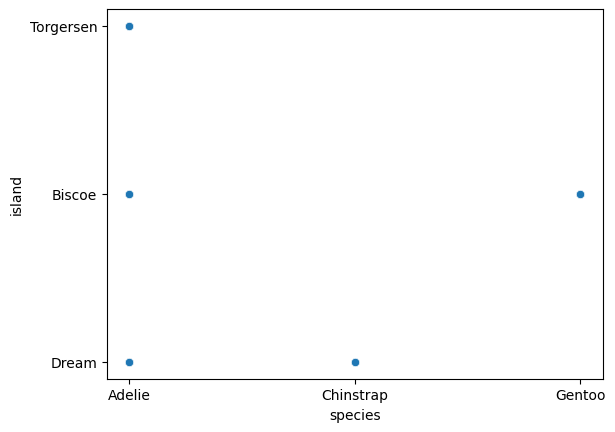

In [ ]:
sns.scatterplot(x=penguins['species'], y=penguins['island'], data=penguins)

In [ ]:
penguinsNumerica = list(penguins.columns)
penguinsNumerica = penguins.drop(['species', 'island', 'sex'], axis = 1)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(penguins[penguinsNumerica])
penguinsNorm = scaler.transform(penguins[penguinsNumerica])



In [ ]:
dfpenguins = pd.DataFrame(penguinsNorm, columns = penguinsNumerica)

dfpenguins

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,NaN,0.666667,NaN,0.291667
1,0.244898,0.511905,0.210526,NaN
2,0.277551,0.583333,0.368421,0.152778
3,NaN,NaN,NaN,NaN
4,NaN,0.738095,0.333333,0.208333
...,...,...,...,...
339,NaN,NaN,NaN,NaN
340,0.542857,0.142857,0.719298,NaN
341,NaN,NaN,NaN,0.847222
342,0.477551,0.202381,NaN,0.694444


In [ ]:
imputer = KNNImputer(n_neighbors=5, weights='distance', copy=True)
imputer.fit(dfpenguins[penguinsNumerica])
dfpenguins[penguinsNumerica] = imputer.transform(dfpenguins[penguinsNumerica])
dfpenguins

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0.169388,0.666667,0.105263,0.291667
1,0.244898,0.511905,0.210526,0.260212
2,0.277551,0.583333,0.368421,0.152778
3,0.416169,0.483119,0.466297,0.409317
4,0.061225,0.738095,0.333333,0.208333
...,...,...,...,...
339,0.416169,0.483119,0.466297,0.409317
340,0.542857,0.142857,0.719298,0.638889
341,0.678717,0.265306,0.780702,0.847222
342,0.477551,0.202381,0.754386,0.694444


In [ ]:
penguinsteste = scaler.inverse_transform(dfpenguins[penguinsNumerica])

penguinstestefinal = pd.DataFrame(penguinsteste, columns = penguinsNumerica)
dfpenguins['species'] = penguins['species']
dfpenguins['island'] = penguins['island']
dfpenguins['sex'] = penguins['sex']

penguinstestefinal


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,37.650000,18.700000,180.000000,3750.000000
1,39.500000,17.400000,186.000000,3636.763981
2,40.300000,18.000000,195.000000,3250.000000
3,43.696137,17.158197,200.578947,4173.541667
4,35.000015,19.300000,193.000000,3450.000000
...,...,...,...,...
339,43.696137,17.158197,200.578947,4173.541667
340,46.800000,14.300000,215.000000,5000.000000
341,50.128571,15.328571,218.500000,5750.000000
342,45.200000,14.800000,216.999988,5200.000000


In [ ]:
penguinsCategorica = penguins.drop(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], axis = 1)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(penguins[penguinsCategorica])
penguinsNNorm = scaler.transform(penguins[penguinsCategorica])
dfpenguins = pd.DataFrame(penguinsNNorm, columns = penguinsCategorica)

ValueError: Boolean array expected for the condition, not object

In [ ]:
imputer = KNNImputer(n_neighbors=5, weights='distance', copy=True)
imputer.fit(dfpenguins[penguinsCategorica])
dfpenguins[penguinsCategorica] = imputer.transform(dfpenguins[penguinsCategorica])
dfpenguins